In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid", palette="muted")



In [2]:
# Load the dataset
file_path = 'Amazon Sale Report (1).csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# View basic information about the dataset
data.info()

# Preview the first few rows
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [3]:
# Drop completely empty columns
cleaned_data = data.drop(columns=['New', 'PendingS'], errors='ignore')

# Fill missing values
cleaned_data['Amount'].fillna(0, inplace=True)
cleaned_data[['ship-city', 'ship-state', 'ship-country']] = cleaned_data[
    ['ship-city', 'ship-state', 'ship-country']
].fillna('Unknown')

# Convert 'Date' column to datetime
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], errors='coerce')

# Drop rows with invalid dates
cleaned_data = cleaned_data.dropna(subset=['Date'])

# Verify the changes
cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            121176 non-null  object        
 12  Amount              128976 non-null  float64       
 13  ship-city           128976 no

C:\Users\Dell\AppData\Local\Temp\ipykernel_13068\2102009046.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], errors='coerce')


In [4]:
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], format='%d-%m-%Y', errors='coerce')

# After conversion, verify the column
print(cleaned_data['Date'].head())

0   2022-04-30
1   2022-04-30
2   2022-04-30
3   2022-04-30
4   2022-04-30
Name: Date, dtype: datetime64[ns]


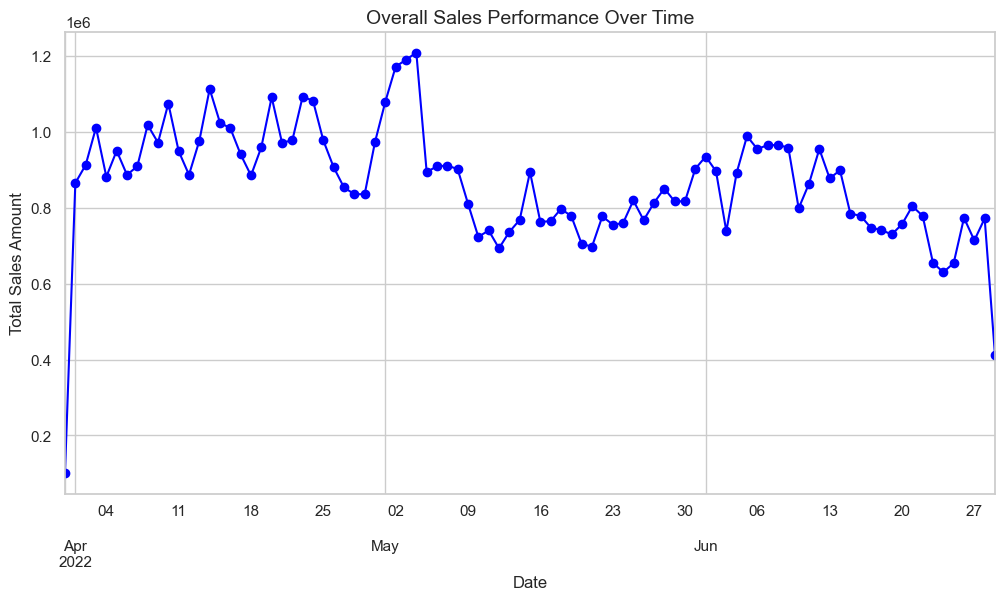

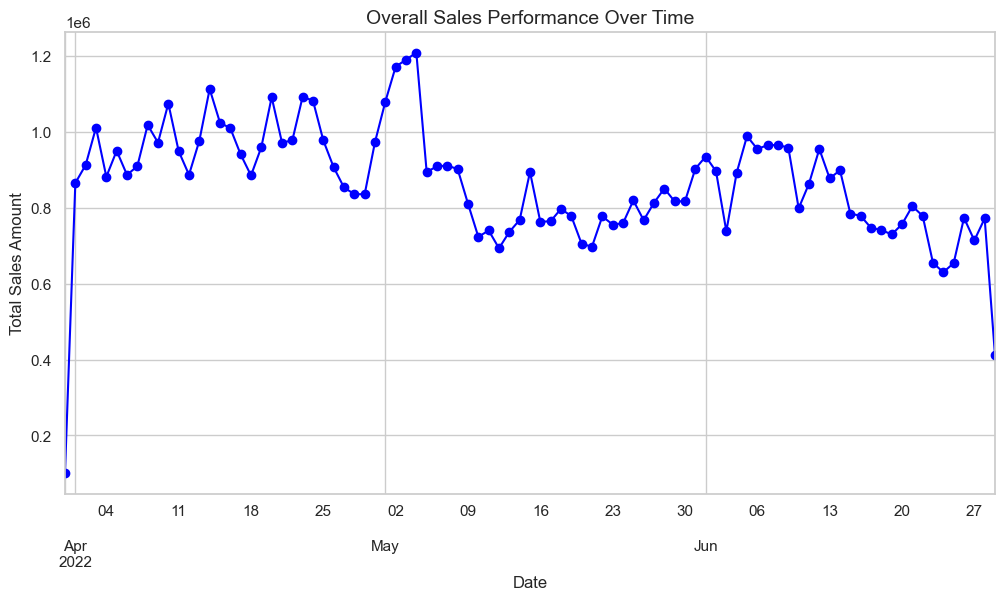

In [5]:
# Aggregate sales data by date
sales_trend = cleaned_data.groupby('Date')['Amount'].sum()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
sales_trend.plot(kind='line', color='blue', marker='o')
plt.title('Overall Sales Performance Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.grid(True)
plt.show()
# Aggregate sales data by date
sales_trend = cleaned_data.groupby('Date')['Amount'].sum()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
sales_trend.plot(kind='line', color='blue', marker='o')
plt.title('Overall Sales Performance Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.grid(True)
plt.show()


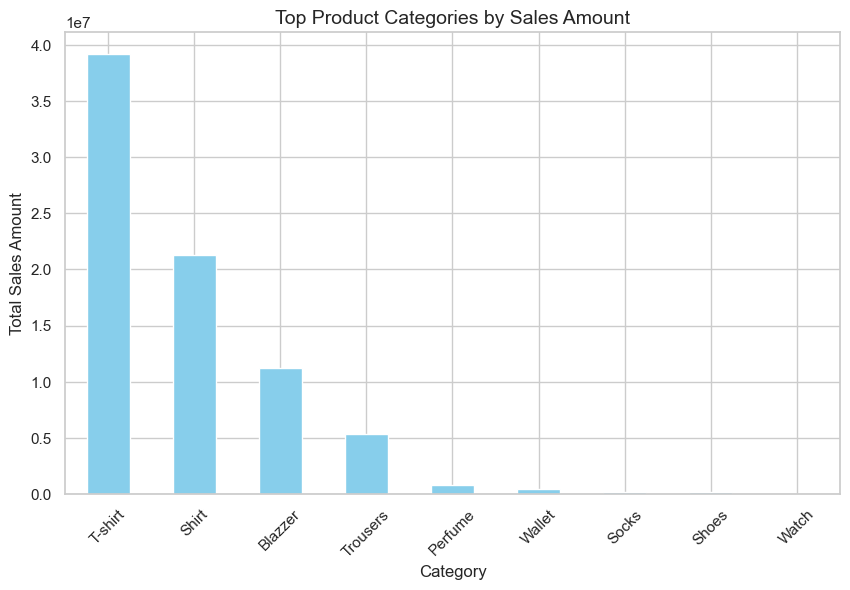

In [6]:
# Aggregate sales by category
category_sales = cleaned_data.groupby('Category')['Amount'].sum().sort_values(ascending=False)

# Plot top product categories
plt.figure(figsize=(10, 6))
category_sales.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Product Categories by Sales Amount', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.show()


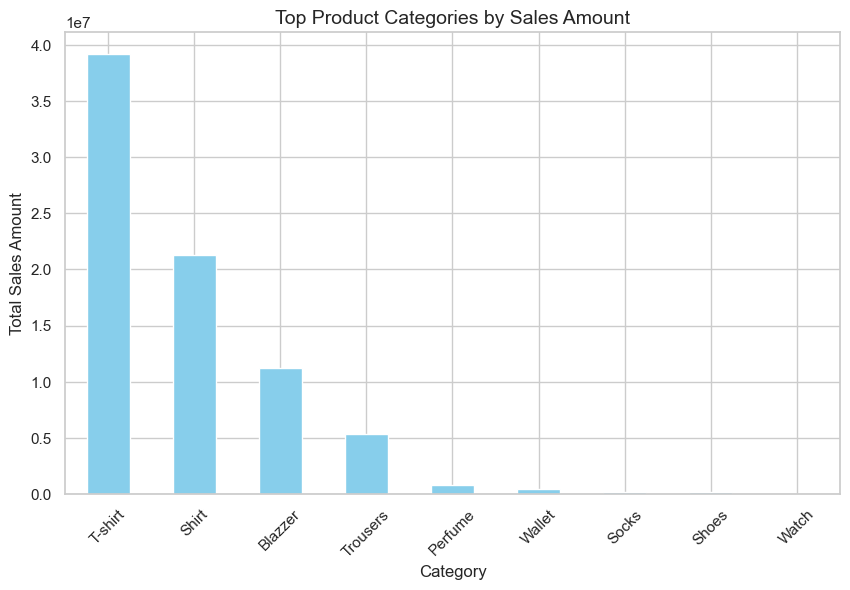

In [7]:
# Aggregate sales by category
category_sales = cleaned_data.groupby('Category')['Amount'].sum().sort_values(ascending=False)

# Plot top product categories
plt.figure(figsize=(10, 6))
category_sales.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Product Categories by Sales Amount', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.show()


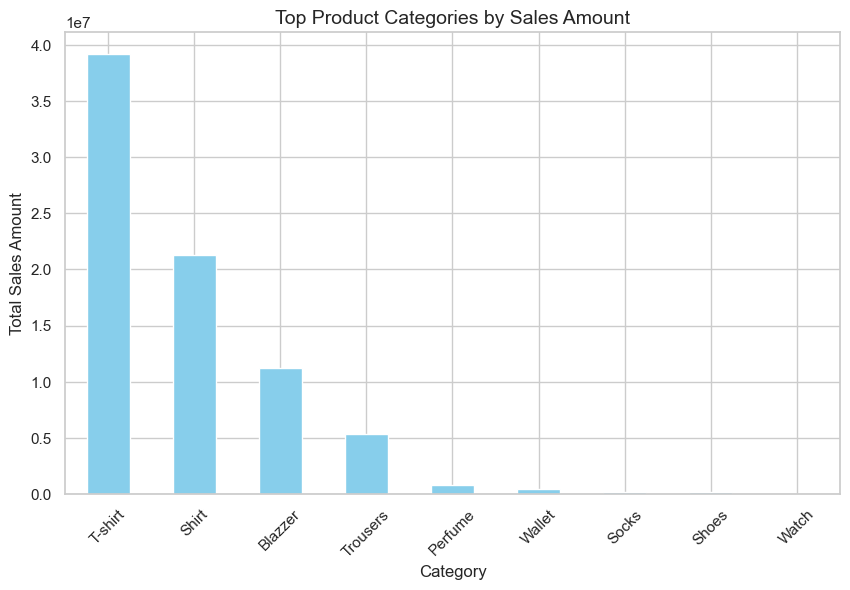

In [8]:
# Aggregate sales by category
category_sales = cleaned_data.groupby('Category')['Amount'].sum().sort_values(ascending=False)

# Plot top product categories
plt.figure(figsize=(10, 6))
category_sales.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Product Categories by Sales Amount', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.show()



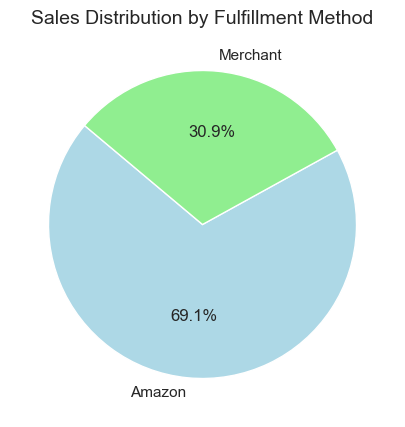

In [9]:
# Aggregate sales by fulfillment method
fulfillment_sales = cleaned_data.groupby('Fulfilment')['Amount'].sum()

# Plot sales by fulfillment method
plt.figure(figsize=(8, 5))
fulfillment_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Sales Distribution by Fulfillment Method', fontsize=14)
plt.ylabel('')
plt.show()


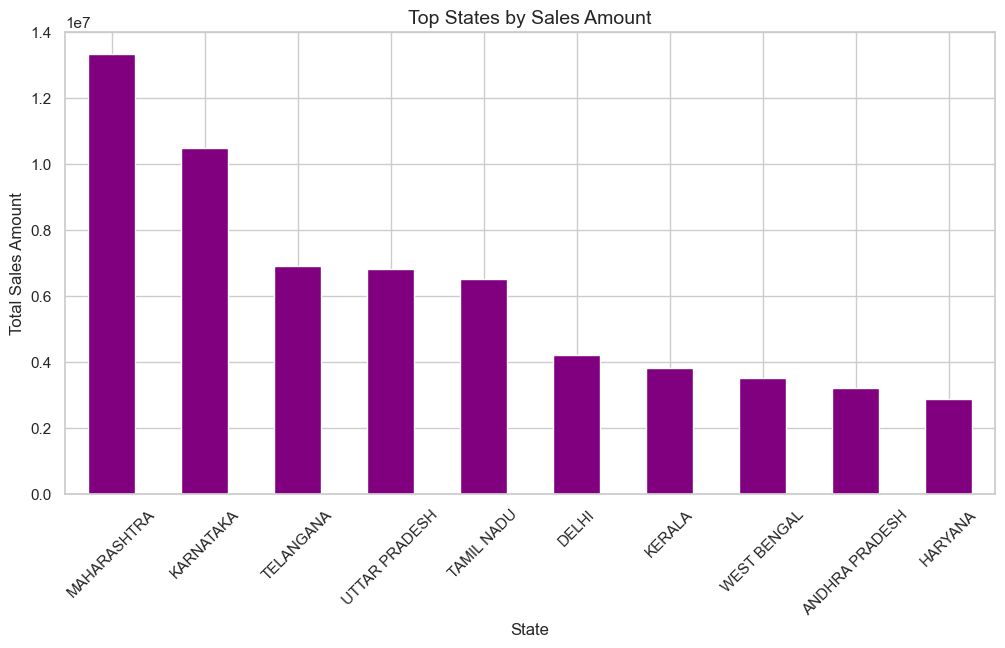

In [10]:
# Aggregate sales by state
state_sales = cleaned_data.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

# Plot top states by sales
plt.figure(figsize=(12, 6))
state_sales.head(10).plot(kind='bar', color='purple')
plt.title('Top States by Sales Amount', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.show()


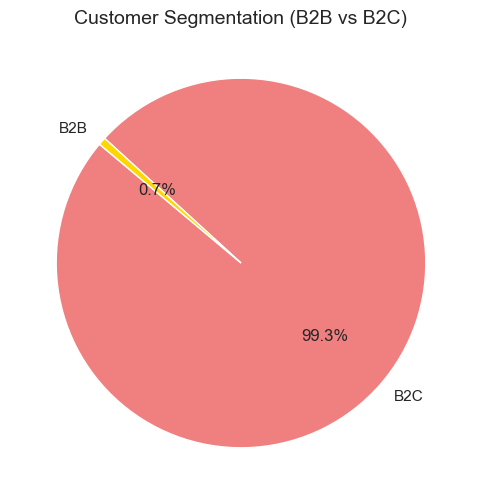

In [11]:
# Count B2B vs B2C transactions
customer_type = cleaned_data['B2B'].value_counts()

# Plot customer segmentation
plt.figure(figsize=(6, 6))
customer_type.plot(kind='pie', autopct='%1.1f%%', labels=['B2C', 'B2B'], startangle=140, colors=['lightcoral', 'gold'])
plt.title('Customer Segmentation (B2B vs B2C)', fontsize=14)
plt.ylabel('')
plt.show()
